In [1]:
import time 
import pandas as pd
from IPython.display import clear_output
from pandas_datareader import data as pdr
from datetime import datetime
# import plotly.express as px
import numpy as np 
from datetime import date, timedelta
import yfinance as yf
import matplotlib as mpl
import pyttsx3

engine = pyttsx3.init()
voices = engine.getProperty('voices')
newVoiceRate = 180
engine.setProperty('rate',newVoiceRate)
engine.setProperty('voice', voices[14].id) #changing index changes voices but ony 0 and 1 are working here



yf.pdr_override() # <== that's all it takes :-)
ticker = 'ICU'
dic = {'Ticker':[],
#        'Bid':[],'Ask':[],
       'Close':[],'TimeStamp':[]}
dfICU = pd.DataFrame(dic)
#adjusting the size of matplotlib
mpl.rc('figure', figsize=(15,10))
# pd.options.plotting.backend = "plotly"

In [2]:
def getSMA(days, ticker):
    start = str(date.today() - timedelta(days))
    end = str(date.today())
    # df = web.DataReader(stock,'yahoo', start, end)

    ICU = pdr.get_data_yahoo(ticker, start)
    ICU.head()
    percentile15 = np.percentile(ICU['Adj Close'], 15)
    percentile85 = np.percentile(ICU['Adj Close'], 85)
    ICU['percentile15'] = percentile15
    ICU['percentile85'] = percentile85
    ICU['Adj Close'].plot(label = ticker, legend = True)
    print("15% percentile", percentile15)
    print("85% percentile", percentile85)
    ICU['percentile15'].plot( label = "15th percentile", legend = True)
    ICU['percentile85'].plot( label = "85th percentile", legend = True)
    return ICU

[*********************100%***********************]  1 of 1 completed
15% percentile 0.817799973487854
85% percentile 0.9777999997138976


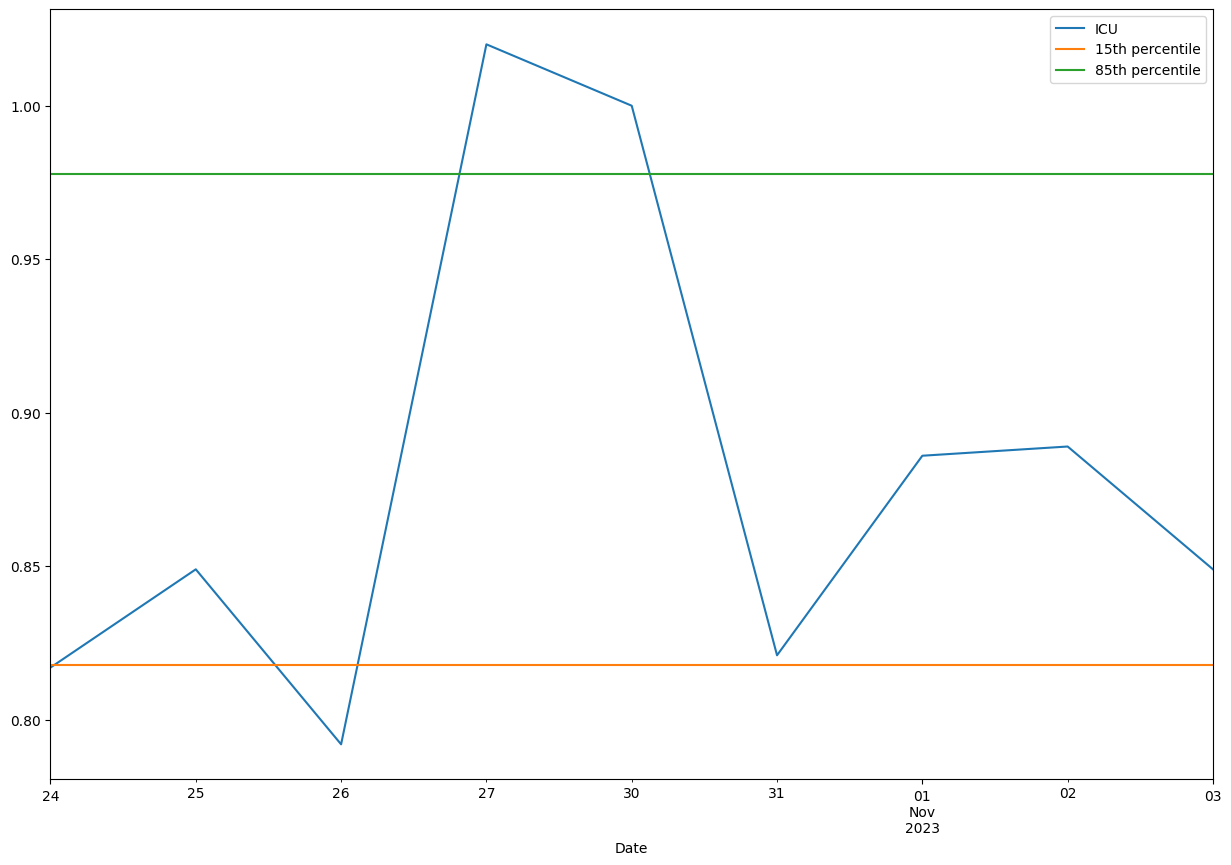

In [3]:
ICU = getSMA(10,ticker)

In [5]:
ICU.head()

,Open,High,Low,Close,Adj Close,Volume,percentile15,percentile85
Date,,,,,,,,
2023-10-24,0.70,0.850,0.650,0.817,0.817,13334900,0.8178,0.9778
2023-10-25,0.75,0.910,0.720,0.849,0.849,6551600,0.8178,0.9778
2023-10-26,0.80,0.815,0.723,0.792,0.792,11617200,0.8178,0.9778
2023-10-27,1.08,1.180,0.928,1.020,1.020,46840100,0.8178,0.9778
2023-10-30,1.20,1.250,0.961,1.000,1.000,51946300,0.8178,0.9778


In [6]:
def convert_num_dollar(num):
    r  =  str(num)
    r = r.split('.')
    return r

In [ ]:
z = 1
PL = -49.29
startP = 0.8962
check= True
checkEven = True
percent15 = ICU['percentile15'][0] 
percent85 = ICU['percentile85'][0] 
timestamp = pd.to_datetime(datetime.now())
Return = (PL/startP)
Return_Per = "{:.2%}".format(Return)
while True and timestamp.hour<16: 
    if check == True:
        check = False
#         engine.say('Hi Fei, good morning. Stock alert starts now!')
#         engine.runAndWait()
        if len(convert_num_dollar(PL))>1:
            pl = convert_num_dollar(round(PL, 2))
            cur = 'Your current Profit and Loss is '+ pl[0] +" $..Spot.. "+pl[1] + "cents."
        else:
            cur = 'Your current Profit and Loss is '+ str(PL) + "$"
        print('Your current Profit and Loss is ',str(PL), "$")
#         engine.say(cur)
#         engine.runAndWait()
    try: 
        ticker_yahoo = yf.Ticker(ticker)
        data = ticker_yahoo.history()
        #data = yf.Ticker(ticker).info
        last_quote = data['Close'].iloc[-1]
        #Volume
        if not last_quote: 
            print("no last_quote!")
            break
    except:
        engine.say("Program cannot request stock info from yahoo finance!")
        print("Program cannot request stock info from yf! Auto quit!")
        engine.runAndWait()
        break
#     bid =  data2['bid']
#     ask =  data2['ask']
#     bidS =  data2['bidSize']
#     askS =  data2['askSize']
#     spread = ((ask - bid) / ask)*100
    if last_quote >= startP and checkEven: 
        sent = "Hi Fei, it is the break even time!"
        print(sent)
#         engine.say(sent)
#         engine.runAndWait()
        checkEven = False
        
    #print the result
    if last_quote <= percent15: 
        if z==1: 
            print(index, row['Adj Close'], '-BUY')
            if len(convert_num_dollar(last_quote))>1:
                lq = convert_num_dollar(round(last_quote, 2))
                buy = 'Time to BUY ICU @' + lq[0]+" $ SPOT "+ lq[1]+" cents."
            else:
                buy = 'Time to BUY ICU @' + str(round(last_quote, 2)) +"$"
#             engine.say(buy)
#             engine.runAndWait()
            closeAdj = row['Adj Close']
            PL -= closeAdj
            z = 0 
    else:
        if last_quote >= percent85:
            if z ==0: 
                print(index, row['Adj Close'], '-SELL')
                if len(convert_num_dollar(last_quote))>1:
                    lq = convert_num_dollar(round(last_quote, 2))
                    sell = 'Time to Sell ICU @' + lq[0]+"$ SPOT "+ lq[1]+" cents."
                else:
                    sell = 'Time to Sell ICU @' + str(round(last_quote, 2)) +"$"
                sell = 'Time to Sell ICU @' + str(round(last_quote, 2)) +"$"
#                 engine.say(sell)
#                 engine.runAndWait()
                closeAdj = row['Adj Close']
                PL += closeAdj
                Return = (PL/startP)
                Return_Per =  "{:.2%}".format(Return)
                print("Total PNL for mean reversion strategy $", round(PL, 2))
                print("Total Return %",Return_Per, "\n")
                z = 1
    if len(dfICU) >200:
        percentile15 = np.percentile(dfICU['Close'], 15)
        percentile85 = np.percentile(dfICU['Close'], 85)
    else:
        percentile15, percentile85 =ICU['percentile15'][-1], ICU['percentile85'][-1]
    print(ticker,'\nCurrent Time',timestamp, '\nLast Price',round(last_quote,4),
          "\nTrading Volume", data['Volume'].iloc[-1],
          '\n15th percentile:',round(percentile15,4),' 85th percentile:',
          round(percentile85,4),'\nyou current P&L on ICU is', round((last_quote - startP )*350,2),"$")
#     fig = px.scatter(dfICU, x='TimeStamp', y=(dfHUBC["Close"]-0.5779)*100,title='ICU Stock Move')
#     fig.update_yaxes(ticklabelposition="inside top", title=None)
#     fig.data[0].update(mode='markers+lines')
#     fig.show()
    timestamp = pd.to_datetime(datetime.now())
#     if 

    dfICU.loc[len(dfICU.index)] = [ticker,last_quote,timestamp] 
    time.sleep(3)
    clear_output(wait=True)
#     df.to_csv('Stock_WatchList.csv', sep='|', index=False)
#     break
print("Total PNL for mean reversion strategy is", round(PL, 2))
print("Total Return %",Return_Per, "\n")
res = "Total Return in percentage for mean reversion strategy is "+ str(Return_Per)
# engine.say(res)
# engine.say("good night!")
# engine.runAndWait()
    

ICU 
Current Time 2023-11-03 15:57:31.276323 
Last Price 0.843 
Trading Volume 4110535 
15th percentile: 0.8178  85th percentile: 0.9778 
you current P&L on ICU is -18.62 $


In [25]:
 dfICU

In [26]:
#today's 15% and 85%

percentile15 = np.percentile(dfICU['Close'], 15)
percentile85 = np.percentile(dfICU['Close'], 85)
dfICU['percentile15'] = percentile15
dfICU['percentile85'] = percentile85
dfICU['Close'].plot(label = ticker, legend = True)
print("15% percentile", percentile15)
print("85% percentile", percentile85)
dfICU['percentile15'].plot( label = "15th percentile", legend = True)
dfICU['percentile85'].plot( label = "85th percentile", legend = True)